SCRAPING TOKOPEDIA

In [2]:
!pip install google_play_scraper

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 2.6 MB/s eta 0:00:00


In [3]:
from google_play_scraper import app, reviews
import pandas as pd
import datetime

In [4]:
from google_play_scraper import reviews, Sort

app_id = 'com.tokopedia.tkpd'

def get_reviews(app_id, lang='id', count=2000, sort=Sort.NEWEST, filter_score_with=None, filter_device_with=None, continuation_token=None):
    try:
        result, continuation_token = reviews(
            app_id,
            lang=lang,
            country='id',
            sort=sort,
            count=count,
            filter_score_with=filter_score_with,
            filter_device_with=filter_device_with,
            continuation_token=continuation_token
        )
        return result, continuation_token
    except Exception as e:
        print("Error:", e)
        return None, None

reviews_data, continuation_token = get_reviews(app_id)

if reviews_data is not None:
    print("Jumlah ulasan:", len(reviews_data))
    if len(reviews_data) > 0:
        print("Ulasan pertama:")
        print(reviews_data[0])
else:
    print("Tidak ada ulasan yang ditemukan.")


Jumlah ulasan: 2000
Ulasan pertama:
{'reviewId': '4d9ad694-3ae1-4fca-8d79-d4ef68d079e7', 'userName': 'Amin Mustholih', 'userImage': 'https://play-lh.googleusercontent.com/a/ACg8ocIGVzZSLgKi7IAbH4a6Vdx8OYltNe7mLR_EdsPpsGLz2LCFZA=mo', 'content': 'jangan pernah beli di Tokopedia banyak toko tipu² semoga play store ngehapus aplikasi Tokopedia', 'score': 1, 'thumbsUpCount': 0, 'reviewCreatedVersion': None, 'at': datetime.datetime(2025, 10, 16, 12, 16, 32), 'replyContent': None, 'repliedAt': None, 'appVersion': None}


In [5]:
import csv

def export_to_csv(reviews, file_name='hasil_scrap_ulasan_app_tokopedia.csv'):
    if reviews:
        fieldnames = ['reviewId', 'userName', 'score', 'content', 'at']

        with open(file_name, mode='w', newline='', encoding='utf-8') as csv_file:
            writer = csv.DictWriter(csv_file, fieldnames=fieldnames)
            writer.writeheader()

            for review in reviews:
                writer.writerow({
                    'reviewId': review['reviewId'],
                    'userName': review['userName'],
                    'score': review['score'],
                    'content': review['content'],
                    'at': review['at']
                })

        print(f"Data berhasil diekspor ke '{file_name}'")
    else:
        print("Tidak ada data ulasan untuk diekspor.")

export_to_csv(reviews_data)

Data berhasil diekspor ke 'hasil_scrap_ulasan_app_tokopedia.csv'


In [6]:
import pandas as pd

data = pd.read_csv('hasil_scrap_ulasan_app_tokopedia.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   reviewId  2000 non-null   object
 1   userName  2000 non-null   object
 2   score     2000 non-null   int64 
 3   content   2000 non-null   object
 4   at        2000 non-null   object
dtypes: int64(1), object(4)
memory usage: 78.3+ KB


In [7]:
data.head(20)

,reviewId,userName,score,content,at
0,4d9ad694-3ae1-4fca-8d79-d4ef68d079e7,Amin Mustholih,1,jangan pernah beli di Tokopedia banyak toko ti...,2025-10-16 12:16:32
1,cbeb53c9-f955-4ac8-aeb3-e777e88908a3,Bong Miaukhian,5,bagus👍👍👍👍👍,2025-10-16 12:10:30
2,273e3d70-0b80-4b8b-8e1d-e34cd8e44bbc,april triani,1,aplikasi makin gk jelas 3 kali gagal kirim nya...,2025-10-16 11:44:16
3,21e85fe9-1928-4cdd-9be8-e3c37f156ff6,Sujana Jana,5,mantap,2025-10-16 11:41:31
4,096b8a3a-6e58-4451-939b-727e1214b6d8,Ilyas Saputra,3,Benerin dong saran pencairan nya ke barang lag...,2025-10-16 11:29:24
5,6ec7067a-462d-4c2a-b59c-959179ad2dc8,Felyansyah Jon Heri,2,"Terdapat bug, terutama dibagian tagihan tokope...",2025-10-16 11:28:48
6,f0e06a2c-1fc0-4321-9cec-2a8816f4ab98,Tony Sendjaja,5,good,2025-10-16 11:07:59
7,ae08f40a-5396-4410-8cb7-039b08790b0c,ERWIN GUNAWAN,1,"mulai saat inj gk akan kasih bintang 5,masalah...",2025-10-16 11:01:41
8,addb94d3-e170-47a6-9feb-5e11bc2d2128,muhammad solehan,1,Tidak bisa diakses di Android 5.1,2025-10-16 10:45:23
9,65f4f1f1-1ab6-4dac-871b-df652ec30d00,Ibrahim,5,LUAR BIASA. CEPAT. PRAKTIS. AKURAT.,2025-10-16 10:36:00


CASE FOLDING

In [8]:
import pandas as pd

df = pd.read_csv("hasil_scrap_ulasan_app_tokopedia.csv")

print("Data dengan huruf kapital:")
sample_data = df[df['content'].apply(lambda x: any(c.isupper() for c in str(x)))].head()
print(sample_data[['content']])

df['content_casefolded'] = df['content'].apply(lambda x: str(x).casefold())

print("\nSetelah case folding:")
if len(sample_data) > 0:
    sample_indices = sample_data.index
    comparison = df.loc[sample_indices, ['content', 'content_casefolded']]
    print(comparison)
else:
    print("Tidak ditemukan data dengan huruf kapital")
    print(df[['content', 'content_casefolded']].head())

print(f"\nTotal data: {len(df)}")
print(f"Data dengan huruf kapital (sebelum case folding): {df['content'].apply(lambda x: any(c.isupper() for c in str(x))).sum()}")

df.to_csv("hasil_casefolding_tokopedia.csv", index=False)
print("\n Hasil case folding telah disimpan ke 'hasil_casefolding_tokopedia.csv'")


Data dengan huruf kapital:
                                             content
0  jangan pernah beli di Tokopedia banyak toko ti...
4  Benerin dong saran pencairan nya ke barang lag...
5  Terdapat bug, terutama dibagian tagihan tokope...
8                  Tidak bisa diakses di Android 5.1
9                LUAR BIASA. CEPAT. PRAKTIS. AKURAT.

Setelah case folding:
                                             content  \
0  jangan pernah beli di Tokopedia banyak toko ti...   
4  Benerin dong saran pencairan nya ke barang lag...   
5  Terdapat bug, terutama dibagian tagihan tokope...   
8                  Tidak bisa diakses di Android 5.1   
9                LUAR BIASA. CEPAT. PRAKTIS. AKURAT.   

                                  content_casefolded  
0  jangan pernah beli di tokopedia banyak toko ti...  
4  benerin dong saran pencairan nya ke barang lag...  
5  terdapat bug, terutama dibagian tagihan tokope...  
8                  tidak bisa diakses di android 5.1  
9                lua

PREPOCESSING

In [9]:
!pip install Sastrawi

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 5.6 MB/s eta 0:00:00


In [10]:
import pandas as pd
import re
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

nltk.download('punkt_tab')
nltk.download('stopwords')

df = pd.read_csv("hasil_casefolding_tokopedia.csv")
df.rename(columns={'content_casefolded': 'Case Folding', 'content': 'Hasil Scrap'}, inplace=True)

df['Token Raw'] = df['Case Folding'].apply(word_tokenize)

stop_words = set(stopwords.words('indonesian'))

def filtering(tokens):
    return [word for word in tokens if word.isalpha() and word not in stop_words]

df['Token Filtered'] = df['Token Raw'].apply(filtering)
df['Filtering'] = df['Token Filtered'].apply(lambda x: ' '.join(x))

#Stemming
factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming_text(text):
    return stemmer.stem(text)

df['Stemming'] = df['Filtering'].apply(stemming_text)

df_final = df[[
    'Hasil Scrap',
    'Case Folding',
    'Filtering',
    'Stemming',
    'Token Raw',
    'Token Filtered'
]]

df_final.to_excel('preprocessing_tokopedia.xlsx', index=False)
print("\n Hasil prepocessing telah disimpan ke 'preprocessing_tokopedia.xlsx'")


[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



 Hasil prepocessing telah disimpan ke 'preprocessing_tokopedia.xlsx'


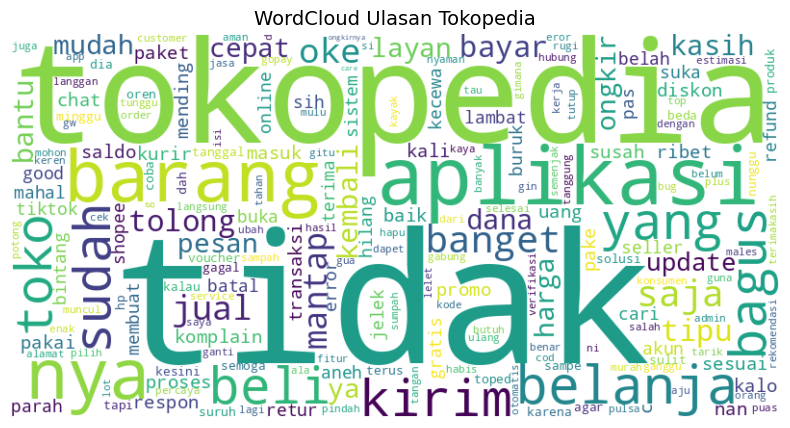


 Hasil lanjutan telah disimpan ke 'tokopedia_lanjutan.xlsx'


In [15]:
import pandas as pd
from collections import OrderedDict
from nltk.util import ngrams
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df = pd.read_excel('preprocessing_tokopedia.xlsx')

normalisasi_dict = {
    "gk": "tidak", "ga": "tidak", "gak": "tidak", "nggak": "tidak", "ngga": "tidak",
    "bgt": "banget", "bngt": "banget", "bener": "benar",
    "udh": "sudah", "dgn": "dengan", "yg": "yang","kga":"tidak",
    "aja": "saja", "tp": "tapi", "klo": "kalau", "blm": "belum",
    "trs": "terus", "krn": "karena", "sm": "sama","kyk": "seperti", "apk":"aplikasi", "bnyak": "banyak",
    "dr": "dari", "jd": "jadi", "mo": "mau", "br": "baru", "bnyak": "banyak", "tokped": "tokopedia",
    "tdk": "tidak",
    "sdh": "sudah",
    "udah": "sudah",
    "dg": "dengan",
    "ny": "nya",
    "nyari": "mencari",
    "nyampe": "sampai",
    "smoga": "semoga",
    "sy": "saya",
    "brg": "barang",
    "brng": "barang",
    "bwt": "buat",
    "karna": "karena",
    "kl": "kalau",
    "klu": "kalau",
    "lg": "lagi",
    "lgi": "lagi",
    "trus": "terus",
    "blom": "belum",
    "bisaaa": "bisa",
    "bisaa": "bisa",
    "aja": "saja",
    "ajaah": "saja",
    "aj": "saja",
    "dtg": "datang",
    "msh": "masih",
    "mksh": "makasih",
    "maksh": "makasih",
    "trimakasih": "terima kasih",
    "tq": "terima kasih",
    "thx": "terima kasih",
    "bgs": "bagus",
    "bgsx": "bagus",
    "beliin": "membelikan",
    "beliinlah": "membelikan",
    "ksh": "kasih",
    "abis": "habis",
    "benerin": "benarkan",
    "bagusan": "lebih bagus",
    "makin": "semakin",
    "ngirim": "mengirim",
    "nyesel": "menyesal",
    "smpe": "sampai",
    "plis": "tolong",
    "tolonglah": "tolong",
    "bikin": "membuat",
    "moga": "semoga",
    "moga2": "semoga",
    "kr": "karena",
    "jg": "juga",
    "ajaa": "saja",
    "ajaaa": "saja",
    "bgus": "bagus",
    "br": "baru",
    "parahh": "parah",
    "bangettt": "banget",
    "mantapp": "mantap",
    "mantappu": "mantap",
    "ok": "oke",
    "okee": "oke",
    "okey": "oke",
    "okeeey": "oke",
    "kmrn": "kemarin",
    "skrg": "sekarang",
    "besok2": "besok",
    "nnti": "nanti",
    "biar": "agar",
    "bgttt":"banget",
    "inj":"ini",
    "dti":"di",
    "woiii":"woi",
    "tgl":"tanggal",

}

def normalisasi_kata(text):
    words = str(text).split()
    normalized = [normalisasi_dict.get(word, word) for word in words]
    return ' '.join(normalized)

df['Normalisasi'] = df['Stemming'].apply(normalisasi_kata)

def remove_duplicates(text):
    words = str(text).split()
    unique_words = list(OrderedDict.fromkeys(words))
    return ' '.join(unique_words)

df['No_Duplikat'] = df['Normalisasi'].apply(remove_duplicates)

import ast
def safe_eval_list(x):
    try:
        return ast.literal_eval(x) if isinstance(x, str) else x
    except Exception:
        return []

df['Token Filtered'] = df['Token Filtered'].apply(safe_eval_list)

def generate_ngrams(tokens, n):
    return list(ngrams(tokens, n))

df['Bigram'] = df['Token Filtered'].apply(lambda x: generate_ngrams(x, 2))
df['Trigram'] = df['Token Filtered'].apply(lambda x: generate_ngrams(x, 3))

all_words = ' '.join(df['No_Duplikat'])
wordcloud = WordCloud(width=800, height=400, background_color='white', collocations=False).generate(all_words)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("WordCloud Ulasan Tokopedia", fontsize=14)
plt.show()

df.to_excel('tokopedia_lanjutan.xlsx', index=False)
print("\n Hasil lanjutan telah disimpan ke 'tokopedia_lanjutan.xlsx'")
